In [1]:
import trompy as tp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename = ".\\ARP3 and ARP5 conditioning and preference metafile.xlsx"
datafolder=".\\data\\"
rows, header=tp.metafilereader(filename)

File is excel file. Making csv metafile first


In [3]:
NR = []
PR = []

for row in rows:
        if row[3] == "NR":
            if row[1] not in NR:
                NR.append(row[1])
        else:
            if row[1] not in PR:
                PR.append(row[1])


In [4]:
NR_male = []
NR_female = []

PR_male = []
PR_female = []


for row in rows:
        if row[3] == "NR" and row[4]=="male":
            if row[1] not in NR_male:
                NR_male.append(row[1])


for row in rows:
        if row[3] == "PR" and row[4]=="male":
            if row[1] not in PR_male:
                PR_male.append(row[1])

for row in rows:
        if row[3] == "NR" and row[4]=="female":
            if row[1] not in NR_female:
                NR_female.append(row[1])
                
for row in rows:
        if row[3] == "PR" and row[4]=="female":
            if row[1] not in PR_female:
                PR_female.append(row[1])


In [6]:
def get_lick_data (rows, mice, solution="malt", phase="conditioning"):
    licks = [] #empty list where data from all mice will be stored
    burst_number = []
    burst_size = []
    for mouse in mice:
        temp_lick = []
        temp_burstnum = []
        temp_burstsize = []
        for row in rows:
            if (row[1] == mouse) and (row[12] == phase):
                if row [6] == solution:
                    [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["b", "c"],  remove_var_header=True)
                    lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                    temp_lick.append(lickdata["total"])
                    temp_burstnum.append(lickdata["bNum"])
                    temp_burstsize.append(lickdata["bMean"])
                elif row [7] == solution:
                    [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["e", "f"],  remove_var_header=True)
                    lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                    temp_lick.append(lickdata["total"])
                    temp_burstnum.append(lickdata["bNum"])
                    temp_burstsize.append(lickdata["bMean"])
        licks.append(np.mean(temp_lick))
        burst_number.append(np.mean(temp_burstnum))
        burst_size.append(np.mean(temp_burstsize))
    
#     data_to_return = {}
#     data_to_return["licks"] = licks
#     data_to_return["burst number"] = burst_number
    data_to_return = {"licks":licks, "burst number": burst_number, "burst size": burst_size}
    return data_to_return


In [7]:
Cond_NR_M_Malt= get_lick_data(rows, NR_male)
Cond_NR_F_Malt = get_lick_data(rows, NR_female)

Cond_NR_M_Cas = get_lick_data(rows, NR_male, solution="casein")
Cond_NR_F_Cas = get_lick_data(rows, NR_female, solution="casein")

Cond_PR_M_Malt = get_lick_data(rows, PR_male)
Cond_PR_F_Malt= get_lick_data(rows, PR_female)

Cond_PR_M_Cas = get_lick_data(rows, PR_male, solution="casein")
Cond_PR_F_Cas = get_lick_data(rows, PR_female, solution="casein")

C:\Users\kvo019\Anaconda3\lib\site-packages\trompy\lick_utils.py:219: RuntimeWarning: invalid value encountered in power
  return (np.exp(-(alpha*x)**beta))
C:\Users\kvo019\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\kvo019\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\kvo019\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Could not calculate burst probability
Could not calculate burst probability
Optimal fit parameters not found
Could not calculate burst probability
Could not calculate burst probability
Could not calculate burst probability
Optimal fit parameters not found
Optimal fit parameters not found
Could not calculate burst probability
Could not calculate burst probability
Optimal fit parameters not found
Could not calculate burst probability
Could not calculate burst probability
Optimal fit parameters not found
Could not calculate burst probability
Optimal fit parameters not found
Optimal fit parameters not found
Could not calculate burst probability
Optimal fit parameters not found
Could not calculate burst probability
Could not calculate burst probability
Could not calculate burst probability


In [8]:
Pref_NR_M_Malt= get_lick_data(rows, NR_male, phase="preference")
Pref_NR_F_Malt = get_lick_data(rows, NR_female, phase="preference")

Pref_NR_M_Cas = get_lick_data(rows, NR_male, solution="casein", phase="preference")
Pref_NR_F_Cas = get_lick_data(rows, NR_female, solution="casein", phase="preference")

Pref_PR_M_Malt = get_lick_data(rows, PR_male, phase="preference")
Pref_PR_F_Malt= get_lick_data(rows, PR_female, phase="preference")

Pref_PR_M_Cas = get_lick_data(rows, PR_male, solution="casein", phase="preference")
Pref_PR_F_Cas = get_lick_data(rows, PR_female, solution="casein", phase="preference")

Could not calculate burst probability
Optimal fit parameters not found
Could not calculate burst probability
Optimal fit parameters not found
Optimal fit parameters not found
Could not calculate burst probability
Could not calculate burst probability
Could not calculate burst probability
Optimal fit parameters not found
Optimal fit parameters not found
Optimal fit parameters not found
Optimal fit parameters not found
Could not calculate burst probability


C:\Users\kvo019\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Could not calculate burst probability
Optimal fit parameters not found
Optimal fit parameters not found


Cannot convert that number of dimensions or data is in wrong format. Attmepting to make graph assuming equal groups.
Cannot convert that number of dimensions or data is in wrong format. Attmepting to make graph assuming equal groups.


Text(0.5, 0.98, 'Conditioning # Licks')

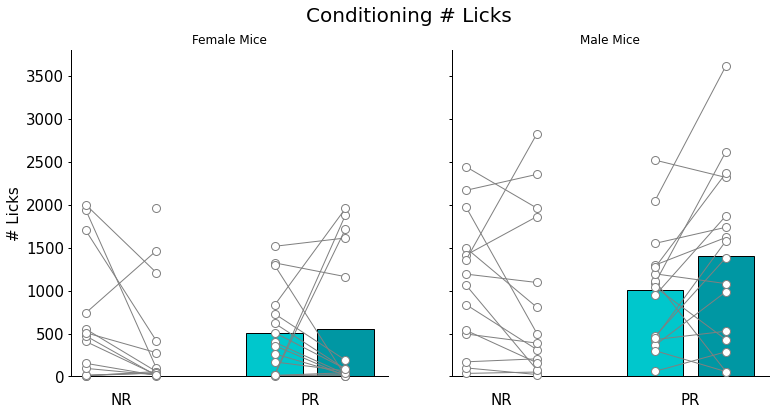

In [9]:
colors = ["lightgrey", "grey", "#00C7CC", "#0097A3"]

f,ax=plt.subplots(figsize=(12.5,6), ncols=2, sharey=True)
tp.barscatter([[Cond_NR_F_Malt["licks"], Cond_NR_F_Cas["licks"]], [Cond_PR_F_Malt["licks"], Cond_PR_F_Cas["licks"]]], 
              paired = True,
              unequal = True,
              grouplabel= ["NR", "PR"],
              xfontsize = 15,
              barfacecolor=colors,
              barfacecoloroption="individual",
              scattersize=80,
              linewidth=1,
              ax=ax[0])

tp.barscatter([[Cond_NR_M_Malt["licks"], Cond_NR_M_Cas["licks"]], [Cond_PR_M_Malt["licks"], Cond_PR_M_Cas["licks"]]], 
              paired = True,
              unequal = True,
              grouplabel= ["NR", "PR"],
              xfontsize = 15,
              barfacecolor=colors,
              barfacecoloroption="individual",
              scattersize=80,
              linewidth=1,
              ax=ax[1])


ax[0].set_ylabel("# Licks", fontsize = 15)
ax[0].tick_params(axis='y', labelsize=15)

ax[0].set_title("Female Mice")
ax[1].set_title("Male Mice")
f.suptitle("Conditioning # Licks", fontsize = 20)



Cannot convert that number of dimensions or data is in wrong format. Attmepting to make graph assuming equal groups.
Cannot convert that number of dimensions or data is in wrong format. Attmepting to make graph assuming equal groups.


Text(0.5, 0.98, 'Conditioning Burst Number')

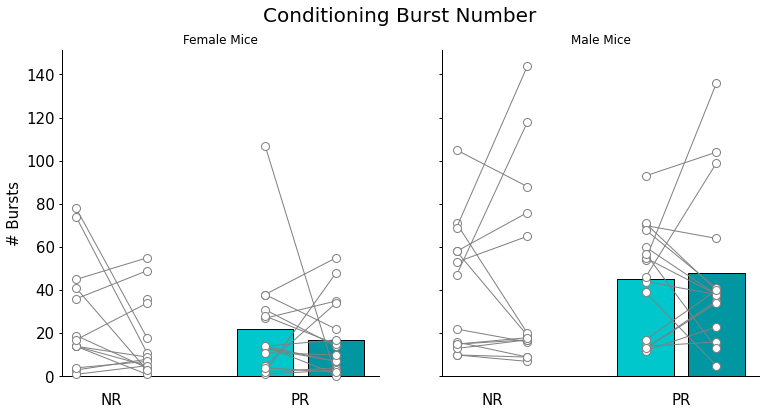

In [10]:
f,ax=plt.subplots(figsize=(12.5,6), ncols=2, sharey=True)
tp.barscatter([[Cond_NR_F_Malt["burst number"], Cond_NR_F_Cas["burst number"]], [Cond_PR_F_Malt["burst number"], Cond_PR_F_Cas["burst number"]]], 
              paired = True,
              unequal = True,
              grouplabel= ["NR", "PR"],
              xfontsize = 15,
              barfacecolor=colors,
              barfacecoloroption="individual",
              scattersize=80,
              linewidth=1,
              ax=ax[0])

tp.barscatter([[Cond_NR_M_Malt["burst number"], Cond_NR_M_Cas["burst number"]], [Cond_PR_M_Malt["burst number"], Cond_PR_M_Cas["burst number"]]], 
              paired = True,
              unequal = True,
              grouplabel= ["NR", "PR"],
              xfontsize = 15,
              barfacecolor=colors,
              barfacecoloroption="individual",
              scattersize=80,
              linewidth=1,
              ax=ax[1])


ax[0].set_ylabel("# Bursts", fontsize = 15)
ax[0].tick_params(axis='y', labelsize=15)

ax[0].set_title("Female Mice")
ax[1].set_title("Male Mice")
f.suptitle("Conditioning Burst Number", fontsize = 20)

Cannot convert that number of dimensions or data is in wrong format. Attmepting to make graph assuming equal groups.
Cannot convert that number of dimensions or data is in wrong format. Attmepting to make graph assuming equal groups.


Text(0.5, 0.98, 'Conditioning Burst Size')

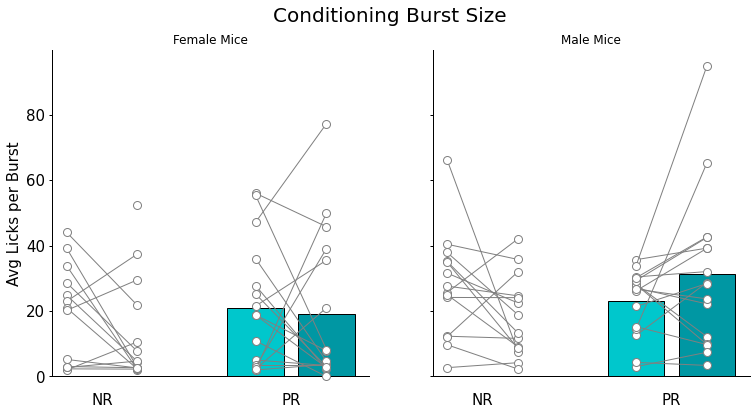

In [11]:
f,ax=plt.subplots(figsize=(12.5,6), ncols=2, sharey=True)
tp.barscatter([[Cond_NR_F_Malt["burst size"], Cond_NR_F_Cas["burst size"]], [Cond_PR_F_Malt["burst size"], Cond_PR_F_Cas["burst size"]]], 
              paired = True,
              unequal = True,
              grouplabel= ["NR", "PR"],
              xfontsize = 15,
              barfacecolor=colors,
              barfacecoloroption="individual",
              scattersize=80,
              linewidth=1,
              ax=ax[0])

tp.barscatter([[Cond_NR_M_Malt["burst size"], Cond_NR_M_Cas["burst size"]], [Cond_PR_M_Malt["burst size"], Cond_PR_M_Cas["burst size"]]], 
              paired = True,
              unequal = True,
              grouplabel= ["NR", "PR"],
              xfontsize = 15,
              barfacecolor=colors,
              barfacecoloroption="individual",
              scattersize=80,
              linewidth=1,
              ax=ax[1])


ax[0].set_ylabel("Avg Licks per Burst", fontsize = 15)
ax[0].tick_params(axis='y', labelsize=15)

ax[0].set_title("Female Mice")
ax[1].set_title("Male Mice")
f.suptitle("Conditioning Burst Size", fontsize = 20)

Cannot convert that number of dimensions or data is in wrong format. Attmepting to make graph assuming equal groups.
Cannot convert that number of dimensions or data is in wrong format. Attmepting to make graph assuming equal groups.


Text(0.5, 0.98, 'Preference Test # Licks')

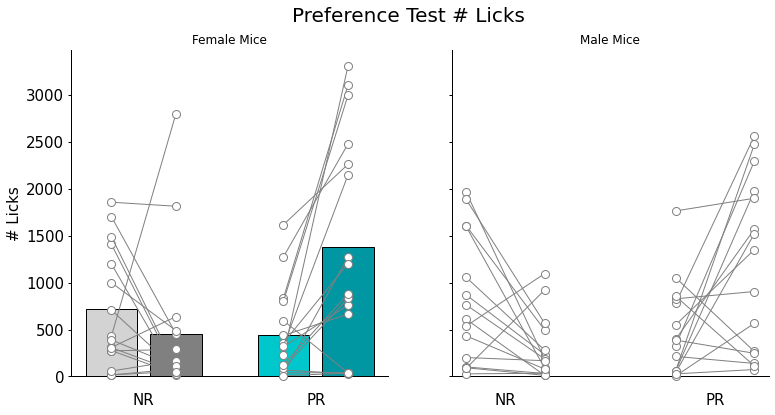

In [12]:
f,ax=plt.subplots(figsize=(12.5,6), ncols=2, sharey=True)
tp.barscatter([[Pref_NR_F_Malt["licks"], Pref_NR_F_Cas["licks"]], [Pref_PR_F_Malt["licks"], Pref_PR_F_Cas["licks"]]], 
              paired = True,
              unequal = True,
              grouplabel= ["NR", "PR"],
              xfontsize = 15,
              barfacecolor=colors,
              barfacecoloroption="individual",
              scattersize=80,
              linewidth=1,
              ax=ax[0])

tp.barscatter([[Pref_NR_M_Malt["licks"], Pref_NR_M_Cas["licks"]], [Pref_PR_M_Malt["licks"], Pref_PR_M_Cas["licks"]]], 
              paired = True,
              unequal = True,
              grouplabel= ["NR", "PR"],
              xfontsize = 15,
              barfacecolor=colors,
              barfacecoloroption="individual",
              scattersize=80,
              linewidth=1,
              ax=ax[1])


ax[0].set_ylabel("# Licks", fontsize = 15)
ax[0].tick_params(axis='y', labelsize=15)

ax[0].set_title("Female Mice")
ax[1].set_title("Male Mice")
f.suptitle("Preference Test # Licks", fontsize = 20)



Cannot convert that number of dimensions or data is in wrong format. Attmepting to make graph assuming equal groups.
Cannot convert that number of dimensions or data is in wrong format. Attmepting to make graph assuming equal groups.


Text(0.5, 0.98, 'Preference Test Burst Number')

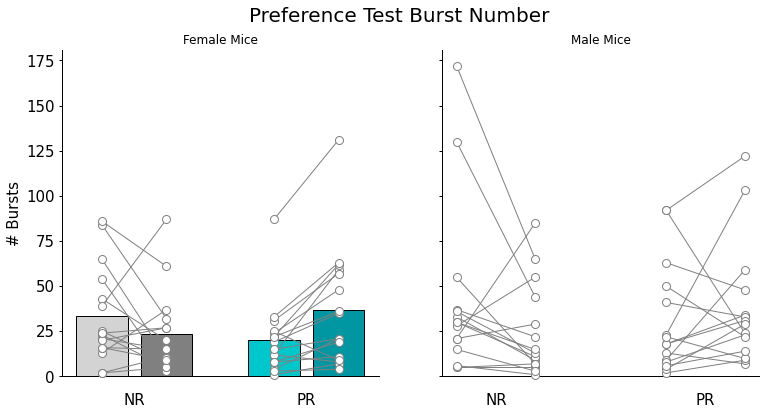

In [13]:
f,ax=plt.subplots(figsize=(12.5,6), ncols=2, sharey=True)
tp.barscatter([[Pref_NR_F_Malt["burst number"], Pref_NR_F_Cas["burst number"]], [Pref_PR_F_Malt["burst number"], Pref_PR_F_Cas["burst number"]]], 
              paired = True,
              unequal = True,
              grouplabel= ["NR", "PR"],
              xfontsize = 15,
              barfacecolor=colors,
              barfacecoloroption="individual",
              scattersize=80,
              linewidth=1,
              ax=ax[0])

tp.barscatter([[Pref_NR_M_Malt["burst number"], Pref_NR_M_Cas["burst number"]], [Pref_PR_M_Malt["burst number"], Pref_PR_M_Cas["burst number"]]], 
              paired = True,
              unequal = True,
              grouplabel= ["NR", "PR"],
              xfontsize = 15,
              barfacecolor=colors,
              barfacecoloroption="individual",
              scattersize=80,
              linewidth=1,
              ax=ax[1])


ax[0].set_ylabel("# Bursts", fontsize = 15)
ax[0].tick_params(axis='y', labelsize=15)

ax[0].set_title("Female Mice")
ax[1].set_title("Male Mice")
f.suptitle("Preference Test Burst Number", fontsize = 20)

Cannot convert that number of dimensions or data is in wrong format. Attmepting to make graph assuming equal groups.
Cannot convert that number of dimensions or data is in wrong format. Attmepting to make graph assuming equal groups.


Text(0.5, 0.98, 'Preference Test Burst Size')

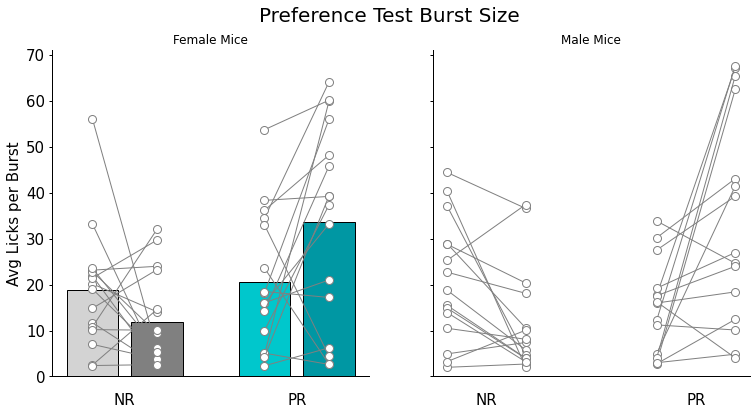

In [16]:

f,ax=plt.subplots(figsize=(12.5,6), ncols=2, sharey=True)
tp.barscatter([[Pref_NR_F_Malt["burst size"], Pref_NR_F_Cas["burst size"]], [Pref_PR_F_Malt["burst size"], Pref_PR_F_Cas["burst size"]]], 
              paired = True,
              unequal = True,
              grouplabel= ["NR", "PR"],
              xfontsize = 15,
              barfacecolor=colors,
              barfacecoloroption="individual",
              scattersize=80,
              linewidth=1,
              ax=ax[0])

tp.barscatter([[Pref_NR_M_Malt["burst size"], Pref_NR_M_Cas["burst size"]], [Pref_PR_M_Malt["burst size"], Pref_PR_M_Cas["burst size"]]], 
              paired = True,
              unequal = True,
              grouplabel= ["NR", "PR"],
              xfontsize = 15,
              barfacecolor=colors,
              barfacecoloroption="individual",
              scattersize=80,
              linewidth=1,
              ax=ax[1])


ax[0].set_ylabel("Avg Licks per Burst", fontsize = 15)
ax[0].tick_params(axis='y', labelsize=15)

ax[0].set_title("Female Mice")
ax[1].set_title("Male Mice")
f.suptitle("Preference Test Burst Size", fontsize = 20)


In [ ]:
Cond_NR_M_Malt_Licks = get_lick_data(rows, NR_male)
Cond_NR_F_Malt_Licks = []

Cond_NR_M_Cas_Licks = []
Cond_NR_F_Cas_Licks = []

Cond_PR_M_Malt_Licks = []
Cond_PR_F_Malt_Licks = []

Cond_PR_M_Cas_Licks = []
Cond_PR_F_Cas_Licks = []


for mouse in NR_male:
    temp = []
    for row in rows:
        if (row[1] == mouse) and (row[12] == "conditioning"):
            if row [5] == "malt":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["b", "c"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
            elif row [6] == "malt":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["e", "f"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
                
    Cond_NR_M_Malt_Licks.append(np.mean(temp))
    
for mouse in NR_male:
    temp = []
    for row in rows:
        if row[1] == mouse:
            if row [5] == "casein":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["b", "c"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
            elif row [6] == "casein":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["e", "f"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
                
    Cond_NR_M_Cas_Licks.append(np.mean(temp))
    
for mouse in NR_female:
    temp = []
    for row in rows:
        if row[1] == mouse:
            if row [5] == "malt":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["b", "c"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
            elif row [6] == "malt":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["e", "f"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
                
    Cond_NR_F_Malt_Licks.append(np.mean(temp))
    
for mouse in NR_female:
    temp = []
    for row in rows:
        if row[1] == mouse:
            if row [5] == "casein":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["b", "c"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
            elif row [6] == "casein":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["e", "f"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
                
    Cond_NR_F_Cas_Licks.append(np.mean(temp))


for mouse in PR_male:
    temp = []
    for row in rows:
        if row[1] == mouse:
            if row [5] == "malt":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["b", "c"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
            elif row [6] == "malt":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["e", "f"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
                
    Cond_PR_M_Malt_Licks.append(np.mean(temp))
    
for mouse in PR_male:
    temp = []
    for row in rows:
        if row[1] == mouse:
            if row [5] == "casein":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["b", "c"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
            elif row [6] == "casein":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["e", "f"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
                
    Cond_PR_M_Cas_Licks.append(np.mean(temp))

for mouse in PR_female:
    temp = []
    for row in rows:
        if row[1] == mouse:
            if row [5] == "malt":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["b", "c"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
            elif row [6] == "malt":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["e", "f"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
                
    Cond_PR_F_Malt_Licks.append(np.mean(temp))
    
for mouse in PR_female:
    temp = []
    for row in rows:
        if row[1] == mouse:
            if row [5] == "casein":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["b", "c"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
            elif row [6] == "casein":
                [onset, offset]=tp.medfilereader(datafolder+row[0], varsToExtract=["e", "f"],  remove_var_header=True)
                lickdata = tp.lickCalc(onset, offset=offset, minburstlength=2)
                temp.append(lickdata["total"])
                
    Cond_PR_F_Cas_Licks.append(np.mean(temp))

    
print(NR_M_Malt_Licks) 
print(NR_F_Malt_Licks) 

print(NR_M_Cas_Licks) 
print(NR_F_Cas_Licks)

print(PR_M_Malt_Licks)
print(PR_F_Malt_Licks) 

print(PR_M_Cas_Licks)
print(PR_F_Cas_Licks) 


In [ ]:
tp.barscatter([[NR_F_Malt_Licks, NR_F_Cas_Licks]], paired=True)

In [ ]:
colors = ["lightgrey", "grey", "lightgrey", "grey", "#00C7CC", "#0097A3", "#00C7CC", "#0097A3"]

f,ax=plt.subplots(figsize=(12.5,6), ncols=1)
tp.barscatter([[NR_M_Malt_Licks, NR_M_Cas_Licks], [NR_F_Malt_Licks, NR_F_Cas_Licks], [PR_M_Malt_Licks, PR_M_Cas_Licks], [PR_F_Malt_Licks, PR_F_Cas_Licks]], 
              paired = True,
              unequal = True,
              grouplabel= ["NR Male", "NR Female", "PR Male", "PR Female"],
              xfontsize = 15,
              barfacecolor=colors,
              barfacecoloroption="individual",
              scattersize=80,
              linewidth=1,
              ax=ax)

ax.set_ylabel("# Licks", fontsize = 15)
y= [0, 500, 1000, 1500, 2000, 2500, 3000, 3500]
ax.tick_params(axis='y', labelsize=15)

f.savefig("C:\\Data\\ARP3_ARP5_Medbox.png")

In [ ]:
NR